In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('gapminder.csv')

In [3]:
y = df['life'].values
X = df['fertility'].values

In [4]:
y_life = y.reshape(-1, 1)
X_fertility = X.reshape(-1, 1)
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_fertility, y_life, test_size = 0.3, random_state=42)

In [6]:
reg_all = LinearRegression()

In [7]:
reg_all.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_1 = reg_all.predict(prediction_space)
# Predict on the test data: y_pred
y_pred_2 = reg_all.predict(X_test)

In [9]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


In [10]:
cv_results = cross_val_score(reg_all, X_fertility, y_life, cv = 3)
print(cv_results)
print(np.mean(cv_results))

[0.75397745 0.55557583 0.57886144]
0.6294715754653507


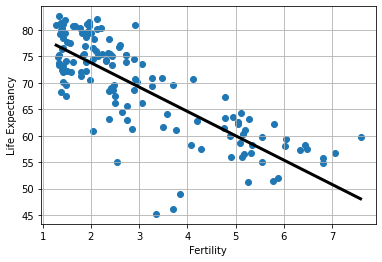

In [11]:
plt.scatter(X_fertility, y_life)
plt.grid()
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.plot(prediction_space, y_pred_1, color='black', linewidth=3)
plt.show()